In [3]:
import pandas as pd
import numpy as np

In [4]:
data = {}

In [8]:
exp = 'exp2021_07_07_1749'

In [12]:
algos = ['reinforce', 'reinforce with state count', 'reinforce with sequence count']#, 'reinforce with state and sequence count']

In [13]:
data[algos[0]] = pd.read_csv(f'data/{exp}/reinforce_res.csv', header=[0, 1], skipinitialspace=True)
data[algos[1]] = pd.read_csv(f'data/{exp}/reinforce_res_st.csv', header=[0, 1], skipinitialspace=True)
data[algos[2]] = pd.read_csv(f'data/{exp}/reinforce_res_seq.csv', header=[0, 1], skipinitialspace=True)
# data[algos[3]] = pd.read_csv(f'data/{exp}/reinforce_res_st_seq.csv', header=[0, 1], skipinitialspace=True)

print("res_r: ", np.sum(np.sum(data[algos[0]])))
print("res_r_st: ", np.sum(np.sum(data[algos[1]])))
print("res_r_seq: ", np.sum(np.sum(data[algos[2]])))
# print("res_r_st_seq: ", np.sum(np.sum(data[algos[3]])))

res_r:  56325.0
res_r_st:  81475.0
res_r_seq:  81750.0


In [30]:
labels = sorted(list(set(data[algos[0]].columns.get_level_values(0))))
num_runs = len(data[algos[0]].columns)

In [31]:
results = {}
for L in labels:
    for alg in algos:
        # results[(L, alg)] = (data[str(alg)][str(L)] > 0).sum()
        results[(L, alg)] = data[str(alg)][str(L)].sum()

In [32]:
results = pd.DataFrame.from_dict(results, orient='columns')
results

6                                                           \
  reinforce reinforce with state count reinforce with sequence count   
0    4250.0                     3975.0                        3825.0   
1    3350.0                     3400.0                        3800.0   
2    3575.0                     4225.0                        3250.0   
3    3000.0                     4075.0                        3775.0   
4    4850.0                     3775.0                        3425.0   
5    3425.0                     3625.0                        3200.0   
6    3700.0                     3875.0                        4025.0   
7    3650.0                     4150.0                        3975.0   

          7                                                           \
  reinforce reinforce with state count reinforce with sequence count   
0    2625.0                     3175.0                        2250.0   
1    1425.0                     2850.0                        3275.0   
2    2600.0                     3575.0                        3425.0   
3    2150.0                     2975.0                        2525.0   
4    2300.0                     2550.0                        2675.0   
5    2200.0                     3075.0                        2925.0   
6    2175.0                     2675.0                        3475.0   
7    2125.0                     2450.0                        2350.0   

          8                                                           \
  reinforce reinforce with state count reinforce with sequence count   
0     650.0                     1825.0                        2675.0   
1     525.0                     1725.0                        2625.0   
2     975.0                     2100.0                        1450.0   
3    1000.0                     1875.0                        2300.0   
4    1100.0                     1750.0                        1950.0   
5     925.0                     1750.0                        2200.0   
6    1400.0                     2025.0                        2050.0   
7     725.0                     1775.0                        2175.0   

          9                                                           
  reinforce reinforce with state count reinforce with sequence count  
0      25.0                     2125.0                        1350.0  
1      50.0                     1425.0                        1650.0  
2     150.0                     1200.0                        1325.0  
3     225.0                     1175.0                        1225.0  
4     150.0                     1350.0                        1900.0  
5     400.0                     1725.0                        1400.0  
6      50.0                     1525.0                        1750.0  
7     575.0                     1700.0                        1550.0

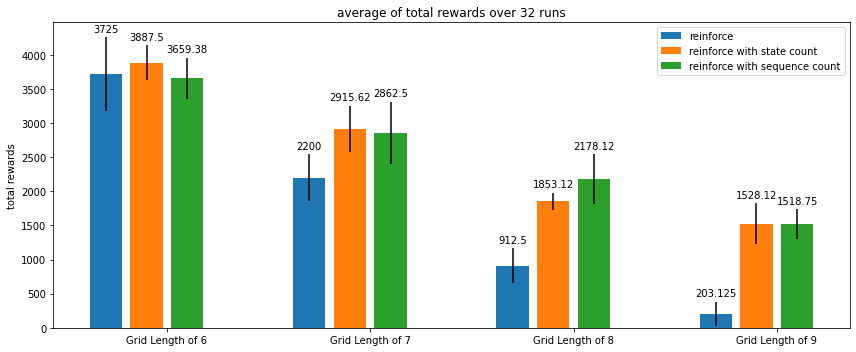

In [33]:
import matplotlib.pyplot as plt

labels = [f'Grid Length of {L}' for L in labels]

x = np.arange(len(labels))  
width = 0.2 

fig, ax = plt.subplots(figsize=(12, 5))

data0 = results.xs(algos[0], axis=1, level=1, drop_level=False).values
data1 = results.xs(algos[1], axis=1, level=1, drop_level=False).values
data2 = results.xs(algos[2], axis=1, level=1, drop_level=False).values
# data3 = results.xs(algos[3], axis=1, level=1, drop_level=False).values

mean0 = np.mean(data0, axis=0)
mean1 = np.mean(data1, axis=0)
mean2 = np.mean(data2, axis=0)
# mean3 = np.mean(data3)

error0 = np.std(data0, axis=0)
error1 = np.std(data1, axis=0)
error2 = np.std(data2, axis=0)
# error3 = np.std(data3)

rects0 = ax.bar(x - 1.5*width, mean0, width*0.8, yerr=error0, ecolor='black', label=algos[0])
rects1 = ax.bar(x - 0.5*width, mean1, width*0.8, yerr=error1, ecolor='black', label=algos[1])
rects2 = ax.bar(x + 0.5*width, mean2, width*0.8, yerr=error2, ecolor='black', label=algos[2])
# rects2 = ax.bar(x + 1.5*width, mean3, width*0.8, yerr=error3, ecolor='black', label=algos[3])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('total rewards')
ax.set_title(f'average of total rewards over {num_runs} runs')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

ax.bar_label(rects0, padding=3)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


fig.tight_layout()

plt.show()

In [26]:
data0

array([[ 650.,   25., 2625., 4250.],
       [ 525.,   50., 1425., 3350.],
       [ 975.,  150., 2600., 3575.],
       [1000.,  225., 2150., 3000.],
       [1100.,  150., 2300., 4850.],
       [ 925.,  400., 2200., 3425.],
       [1400.,   50., 2175., 3700.],
       [ 725.,  575., 2125., 3650.]])

In [42]:
exp = ['grid_length10', 'grid_length15_3', 'grid_length20']
exp_map = {
    'grid_length10': '10',
    'grid_length15_3': '15',
    'grid_length20': '20'
}

In [63]:
algos = ['reinforce_res', 'reinforce_res_st', 'reinforce_res_seq']

mean = {}
error = {}

for a in algos:
    for e in exp:
        d = pd.read_csv(f'data/{e}/{a}.csv', header=[0, 1], skipinitialspace=True)
        mean[(exp_map[e], a)] = d.sum().mean()
        error[(exp_map[e], a)] = d.sum().std()

In [68]:
mean_upd = {a:[] for a in algos}
error_upd = {a:[] for a in algos}
for k, v in mean.items():
    mean_upd[k[1]].append(v)
for k, v in error.items():
    error_upd[k[1]].append(v)

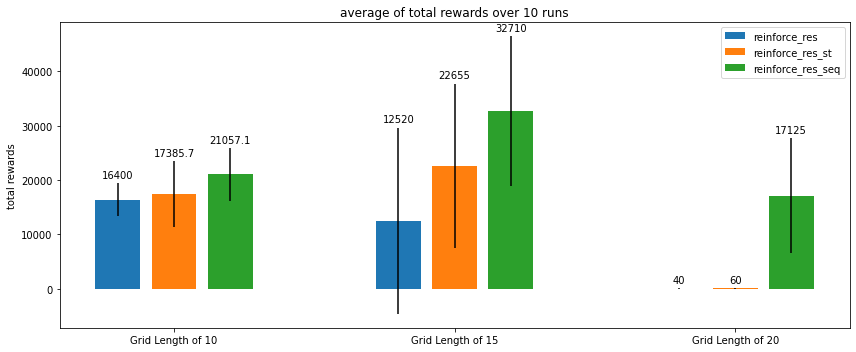

In [71]:
labels = [f'1D Grid Length of {L}' for L in exp_map.values()]
num_runs= 10
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 5))

if len(algos) == 4:
    pos = [-1.5, -0.5, 0.5, 1.5]
if len(algos) == 3:
    pos = [-1, 0, 1]

for i, a in enumerate(algos):
    mean = np.array(mean_upd[a])
    error = np.array(error_upd[a])

    rect = ax.bar(x + pos[i] * width, mean, width*0.8,
                  yerr=error, ecolor='black', label=a)
    ax.bar_label(rect, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('total rewards')
ax.set_title(f'average of total rewards over {num_runs} runs')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

fig.tight_layout()

plt.show()

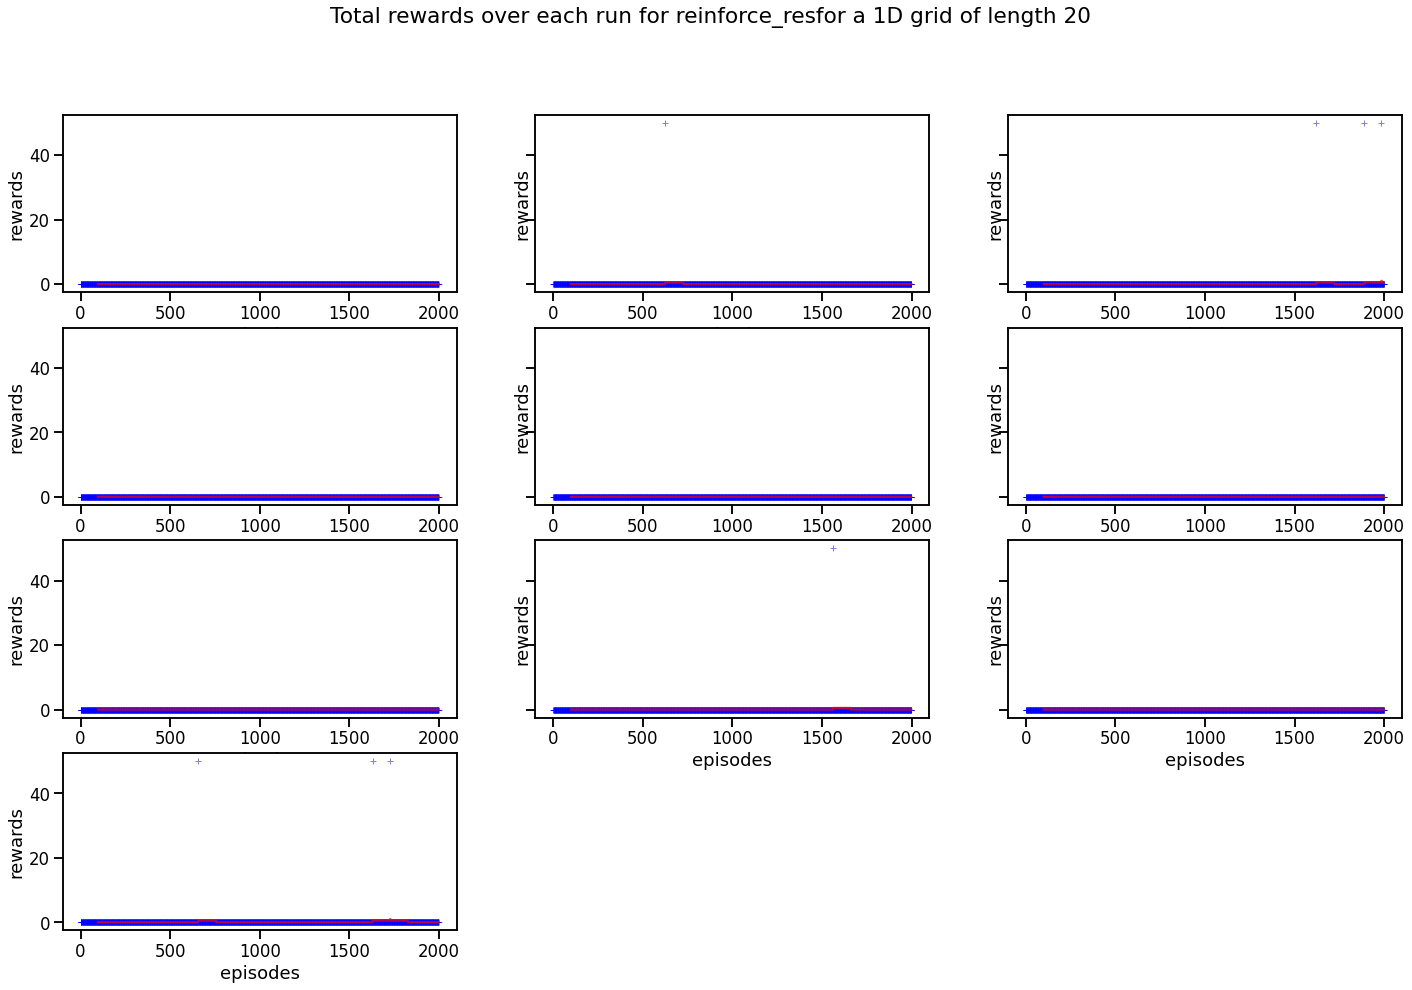

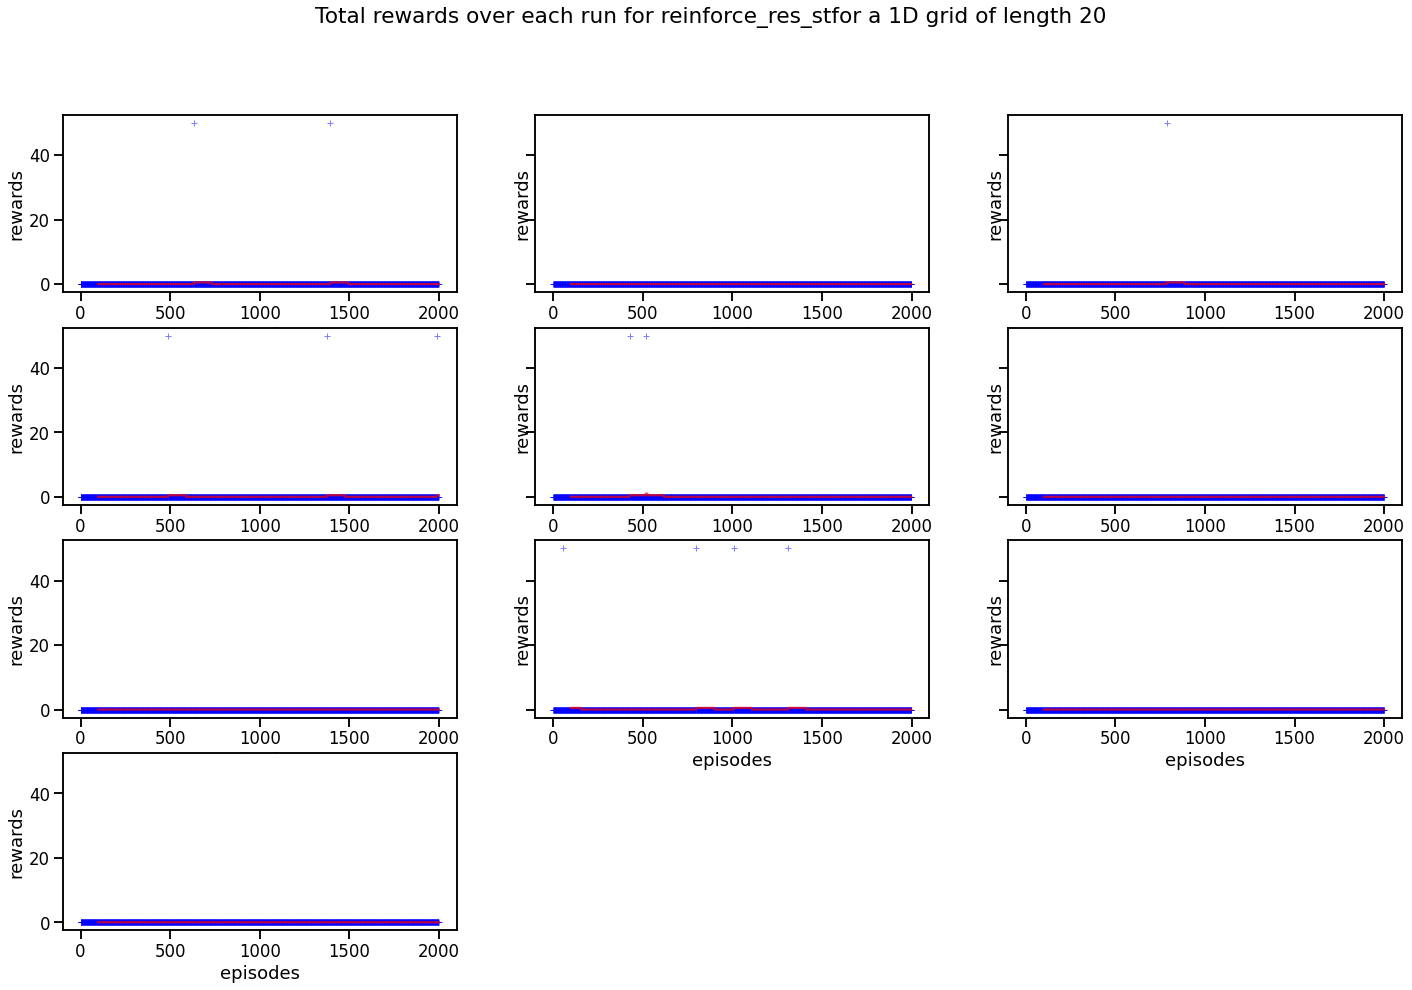

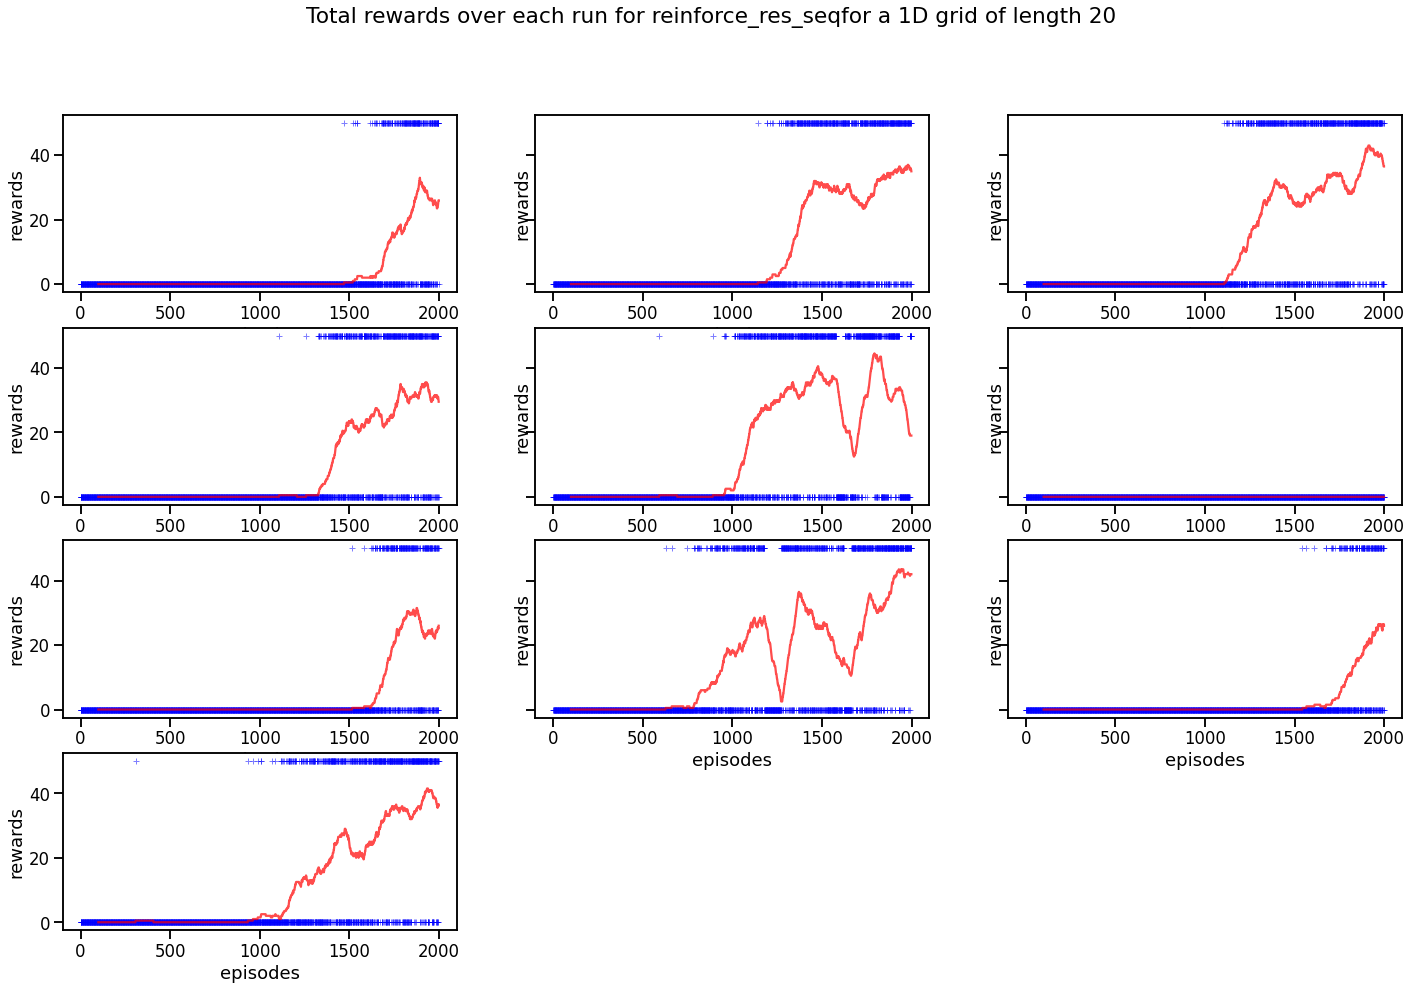

In [74]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from IPython.display import display

from utils import plot_scores_grid


exp = 'data/' + 'grid_length20'

data = {}

algos = [x[:-4] for x in os.listdir(f'{exp}')]
algos.sort(key=lambda x: len(x))

for a in algos:
    data[a] = pd.read_csv(
        f'{exp}/{a}.csv', header=[0, 1], skipinitialspace=True)

labels = sorted(list(set(data[algos[0]].columns.get_level_values(0))))
num_runs = len(data[algos[0]].columns)

for a in algos:
    plot_scores_grid(data[a], labels, num_runs, a+'for a 1D grid of length 20')

In [81]:
exp = ['grid2d_length6_1', 'grid2d_sparse_length6']
exp_map = {
    'grid2d_length6_1': '6',
    'grid2d_sparse_length6': '6sparse',
}

In [82]:
algos = ['reinforce_res', 'reinforce_res_st', 'reinforce_res_seq']

mean = {}
error = {}

for a in algos:
    for e in exp:
        d = pd.read_csv(f'data/{e}/{a}.csv', header=[0, 1], skipinitialspace=True)
        mean[(exp_map[e], a)] = d.sum().mean()
        error[(exp_map[e], a)] = d.sum().std()

In [83]:
mean_upd = {a:[] for a in algos}
error_upd = {a:[] for a in algos}
for k, v in mean.items():
    mean_upd[k[1]].append(v)
for k, v in error.items():
    error_upd[k[1]].append(v)

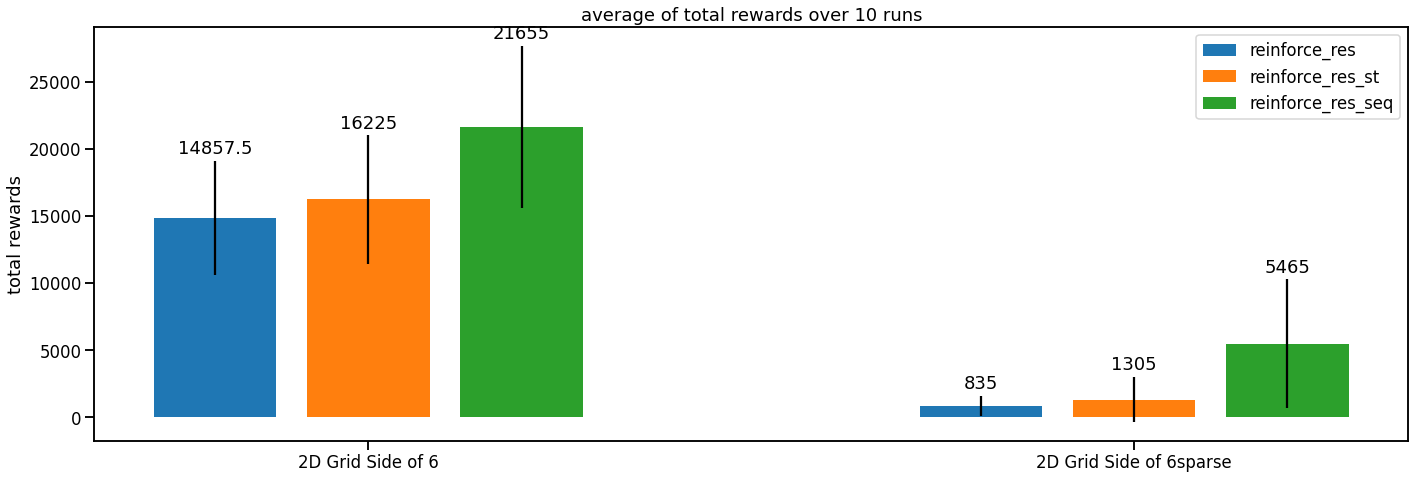

In [88]:
labels = [f'2D Grid Side of {L}' for L in exp_map.values()]
num_runs= 10
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(20, 7))

if len(algos) == 4:
    pos = [-1.5, -0.5, 0.5, 1.5]
if len(algos) == 3:
    pos = [-1, 0, 1]

for i, a in enumerate(algos):
    mean = np.array(mean_upd[a])
    error = np.array(error_upd[a])

    rect = ax.bar(x + pos[i] * width, mean, width*0.8,
                  yerr=error, ecolor='black', label=a)
    ax.bar_label(rect, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('total rewards')
ax.set_title(f'average of total rewards over {num_runs} runs')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

fig.tight_layout()

plt.show()